In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [183]:
df = pd.read_csv('data/reduced_dataset-release.csv')

In [184]:
# Basic Dataset Information
print("Dataset Overview:\n")
print(df.info())

# First Few Rows of the Dataset
print("\nFirst few rows:\n")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D     85171 non-null   float64
 11  VOLATILITY_30D     85165 non-null   float64
 12  LSTM_POLARITY      85175 non-null   object 
 13  TEXTBLOB_POLARITY  45594 non-null   object 
 14  MENTION            27073 non-null   object 
dtypes: float64(8), object(7)
memory u

In [185]:
# Drop unnecessary column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [186]:
# DATE column to datetime format
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [187]:
# Convert all columns for sentiment polarity to numeric
for col in ['LSTM_POLARITY', 'TEXTBLOB_POLARITY']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [188]:
# Check Duplicated Tweets
print(df[df.duplicated()])

                                                    TWEET       STOCK DATE  \
19                                                 Amazon  31/01/2017  NaT   
24      RT @DrJimmyStar: Check out Mens Encore by Fies...         NaN  NaT   
25                                                   eBay  31/01/2017  NaT   
27      RT @tarastrong: Just got @facebook back! I REA...         NaN  NaT   
28                                               Facebook  31/01/2017  NaT   
...                                                   ...         ...  ...   
143270  @arcade_1up @Walmart @GameStop @BedBathBeyond ...         NaN  NaT   
143272  Are fucking kidding me the nightmare before Ch...         NaN  NaT   
143274  RT @Kenneth00542118: Just saw this on Amazon: ...         NaN  NaT   
143277  https://t.co/IsS8FGekqH: New Releases - Amazon...         NaN  NaT   
143280  Homegate with Lipton® Iced Tea from Walmart th...         NaN  NaT   

        LAST_PRICE  1_DAY_RETURN  2_DAY_RETURN  3_DAY_RETURN  7

In [189]:
# Added handling for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TWEET                     3
STOCK                 58106
DATE                 116064
LAST_PRICE            58106
1_DAY_RETURN          58106
2_DAY_RETURN          58106
3_DAY_RETURN          58106
7_DAY_RETURN          58106
PX_VOLUME             58106
VOLATILITY_10D        58111
VOLATILITY_30D        58117
LSTM_POLARITY         97689
TEXTBLOB_POLARITY    116209
MENTION              116209
dtype: int64


In [190]:
# Fill or drop missing values (depending on distribution)
# Rows with at least one of these three columns with a missing value removed
df.dropna(subset=['STOCK', 'LAST_PRICE', '1_DAY_RETURN'], inplace=True)

In [191]:
# Statistics Description
print(df.describe())

                                DATE     LAST_PRICE  1_DAY_RETURN  \
count                          27218   85176.000000  85176.000000   
mean   2017-12-14 07:17:32.039091968     229.142895      0.004375   
min              1703-05-01 00:00:00      -0.173554     -0.177851   
25%              2017-12-30 00:00:00      -0.000414     -0.005989   
50%              2018-09-13 00:00:00       0.009971      0.001119   
75%              2018-09-28 00:00:00      49.972500      0.013603   
max              2248-05-01 00:00:00  165500.000000      0.243639   
std                              NaN    3227.736241      0.022527   

       2_DAY_RETURN  3_DAY_RETURN  7_DAY_RETURN     PX_VOLUME  VOLATILITY_10D  \
count  85176.000000  8.517600e+04  8.517600e+04  8.517600e+04    85171.000000   
mean       0.007293  5.891352e+06  2.020673e+06  4.094358e+06       11.883457   
min       -0.204959 -1.778512e-01 -2.049587e-01  1.000000e+00       -1.000000   
25%       -0.009848  0.000000e+00  3.386809e-02  1.715

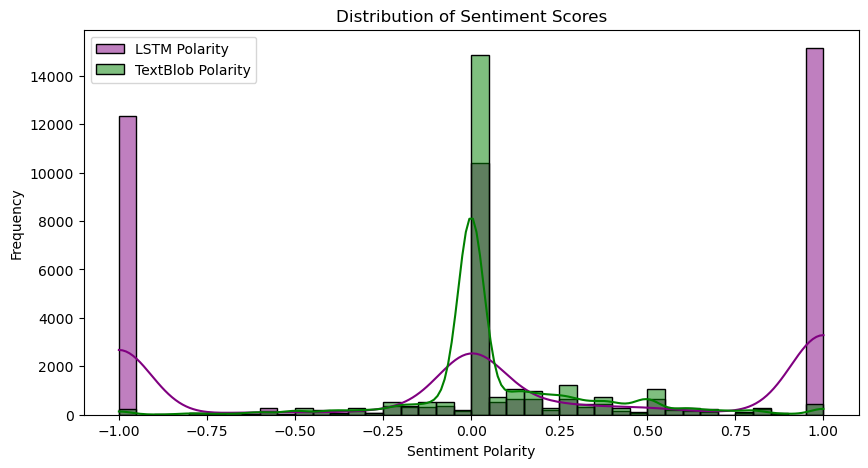

In [192]:
# Visualizing Sentiment Distribution with KDE for easier view of the Distribution across the Plot
plt.figure(figsize=(10, 5))
sns.histplot(df['LSTM_POLARITY'].dropna(), kde=True, bins=40, color='purple', label='LSTM Polarity')
sns.histplot(df['TEXTBLOB_POLARITY'].dropna(), kde=True, bins=40, color='green', label='TextBlob Polarity')
plt.legend()
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

In [193]:
# The lstm_polarity column represents the sentiment polarity of tweets as determined by a Long Short-Term Memory (LSTM) neural network model. 
# The LSTM model reads the text of each tweet and derive a sentiment score, typically denoting positive, negative, or neutral sentiment.

In [194]:
# Textblob_polarity column represents sentiment polarity of tweets as analyzed using TextBlob library. 
# TextBlob is a Python library for processing textual data with APIs for natural language processing operations like sentiment analysis. 
# Polarity score returned by TextBlob ranges from -1 to 1, with: 
# -1: Represents an extremely negative sentiment.
# 0: Represents a neutral sentiment.
# 1: Represents an extremely positive sentiment.

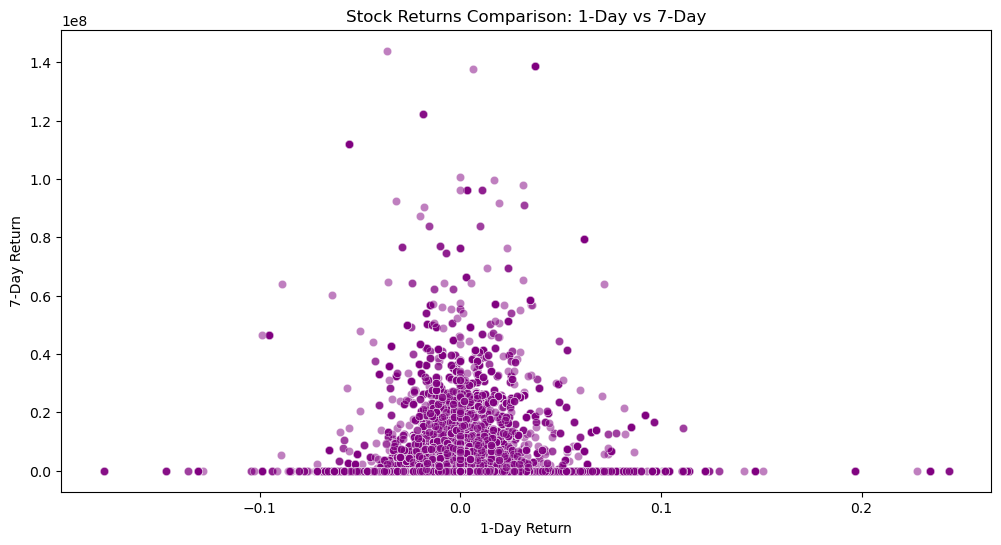

In [195]:
# Stock Returns Comparison. 1 day vs 7 days after Tweets
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='1_DAY_RETURN', y='7_DAY_RETURN', alpha=0.5, color='purple')
plt.title("Stock Returns Comparison: 1-Day vs 7-Day")
plt.xlabel("1-Day Return")
plt.ylabel("7-Day Return")
plt.show()

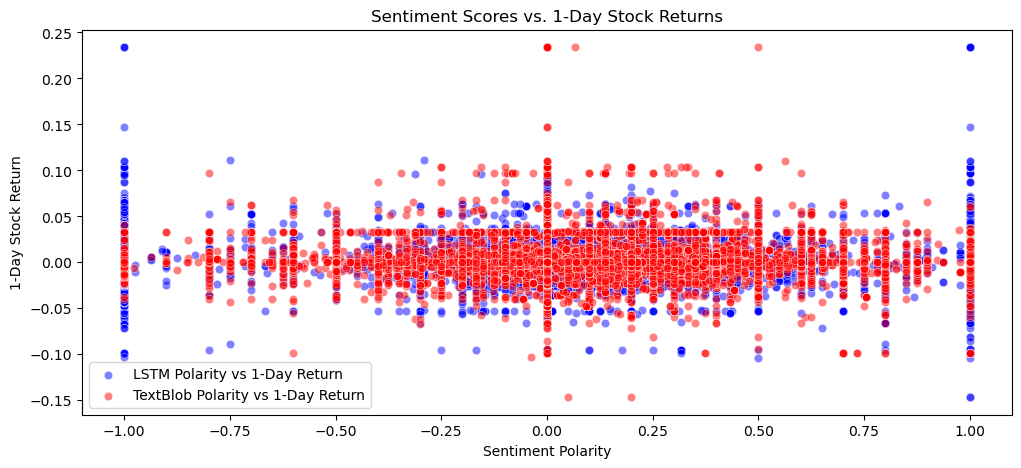

In [196]:
# 1 Day Correlation Analysis of Sentiment vs Return
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['LSTM_POLARITY'], y=df['1_DAY_RETURN'], alpha=0.5, color='blue', label='LSTM Polarity vs 1-Day Return')
sns.scatterplot(x=df['TEXTBLOB_POLARITY'], y=df['1_DAY_RETURN'], alpha=0.5, color='red', label='TextBlob Polarity vs 1-Day Return')
plt.title("Sentiment Scores vs. 1-Day Stock Returns")
plt.xlabel("Sentiment Polarity")
plt.ylabel("1-Day Stock Return")
plt.legend()
plt.show()

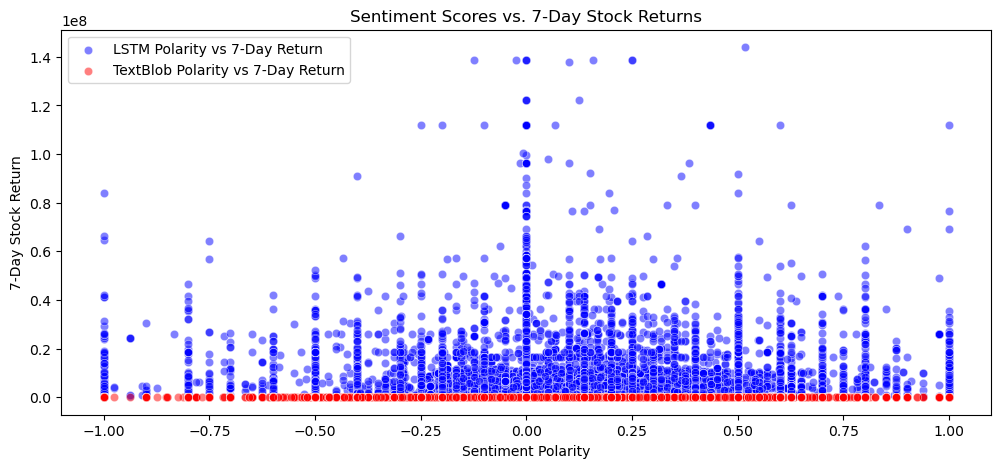

In [197]:
# 7 day Correlation Analysis of Sentiment vs Return
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['LSTM_POLARITY'], y=df['7_DAY_RETURN'], alpha=0.5, color='blue', label='LSTM Polarity vs 7-Day Return')
sns.scatterplot(x=df['TEXTBLOB_POLARITY'], y=df['7_DAY_RETURN'], alpha=0.5, color='red', label='TextBlob Polarity vs 7-Day Return')
plt.title("Sentiment Scores vs. 7-Day Stock Returns")
plt.xlabel("Sentiment Polarity")
plt.ylabel("7-Day Stock Return")
plt.legend()
plt.show()

Analyzing stock volatility over 10-day and 30-day periods:


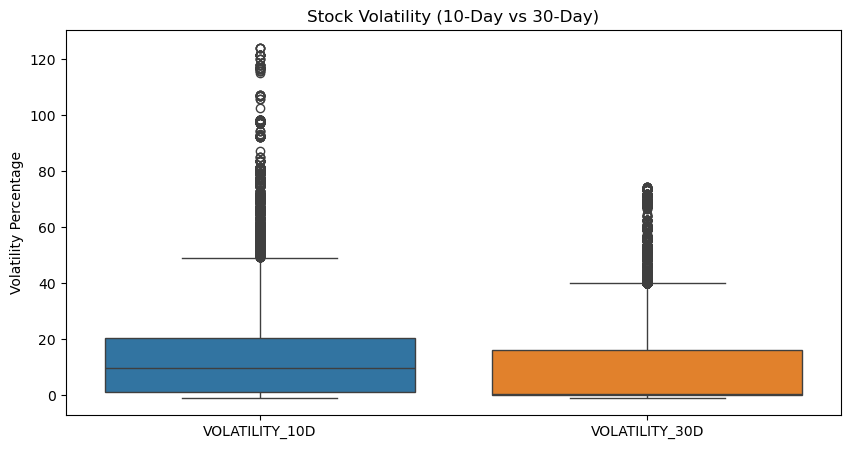

In [198]:
# Stock Volatility Analysis after Tweets
print("Analyzing stock volatility over 10-day and 30-day periods:")
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['VOLATILITY_10D', 'VOLATILITY_30D']])
plt.title("Stock Volatility (10-Day vs 30-Day)")
plt.ylabel("Volatility Percentage")
plt.show()

In [199]:
# Shows that volatility in 10d is much higher following tweets than it is in 30d. 
# Focusing on short-term movements will lead to better results in returns based off of sentiment. 

In [200]:
# Feature Engineering
# Calculating Sentiment Change (Difference From Previous Day per Stock)
df['SENTIMENT_CHANGE'] = df.groupby('STOCK')['LSTM_POLARITY'].diff()

In [201]:
# How Many Times a Stock Was Mentioned per day
df['TWEET_COUNT'] = df.groupby(['STOCK', 'DATE'])['MENTION'].transform('count')

In [202]:
# Identifying High Activity Stocks
# Calculate the number of tweets per stock per day
df['TWEET_SPIKE'] = df.groupby(['STOCK', 'DATE'])['TWEET_COUNT'].transform(lambda x: (x - x.mean()) / x.std())

In [203]:
# Classify Stocks into Winner or Loser
# Threshold for Winner: 3%. Threshold for Loser: -3%.
df['STOCK_CATEGORY'] = df['1_DAY_RETURN'].apply(lambda x: 'Winner' if x > 0.03 else ('Loser' if x < -0.03 else 'Neutral'))

In [204]:
# Find Extreme Sentiment Cases. Highly positive or Highly Negative
df['EXTREME_SENTIMENT'] = df['LSTM_POLARITY'].apply(lambda x: 1 if abs(x) > 0.8 else 0)

In [205]:
# Handle NaNs in new features
df['SENTIMENT_CHANGE'].fillna(0, inplace=True)  # No sentiment change when missing
df['TWEET_SPIKE'].fillna(0, inplace=True)  # No spike when missing
df['EXTREME_SENTIMENT'].fillna(0, inplace=True)  # Default to 0 if missing

In [206]:
# Select features after Handling
X = df[['SENTIMENT_CHANGE', 'TWEET_SPIKE', 'PX_VOLUME', 'VOLATILITY_10D', 'VOLATILITY_30D', 'EXTREME_SENTIMENT']]
y = df['1_DAY_RETURN']

# Drop rows where the target variable is missing
X.dropna(inplace=True)
y = y.loc[X.index]

print(f"Number of samples after handling missing values: {X.shape[0]}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Number of samples after handling missing values: 85160


R² Score: 0.0063
Mean Squared Error: 0.000511
LinearRegression performance:


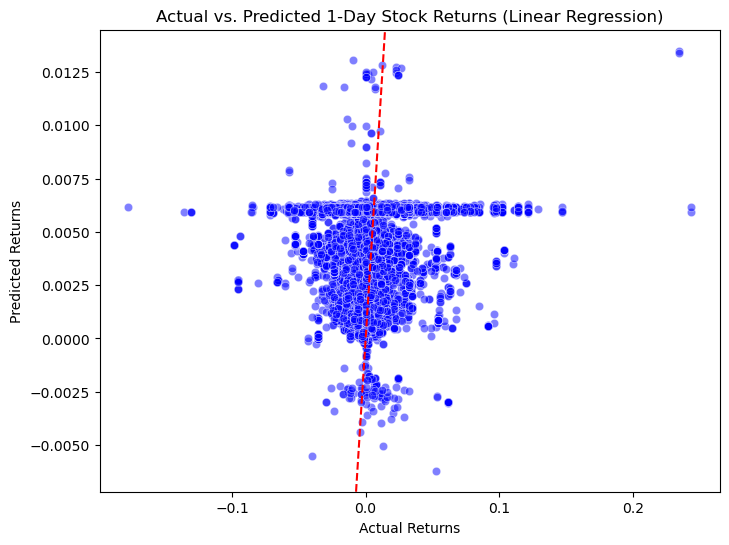

In [207]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Model Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")

# Scatter plot of actual vs predicted returns
print("LinearRegression performance:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed")  # Reference line for perfect predictions
plt.title("Actual vs. Predicted 1-Day Stock Returns (Linear Regression)")
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.show()

In [208]:
# Random Forest Regression Model (Decided to also try this model to see if the predictions can be improved)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [209]:
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"RandomForestRegression:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.6f}")

RandomForestRegression:
R² Score: 0.8670
Mean Squared Error: 0.000068


RandomForestRegressor predictions:


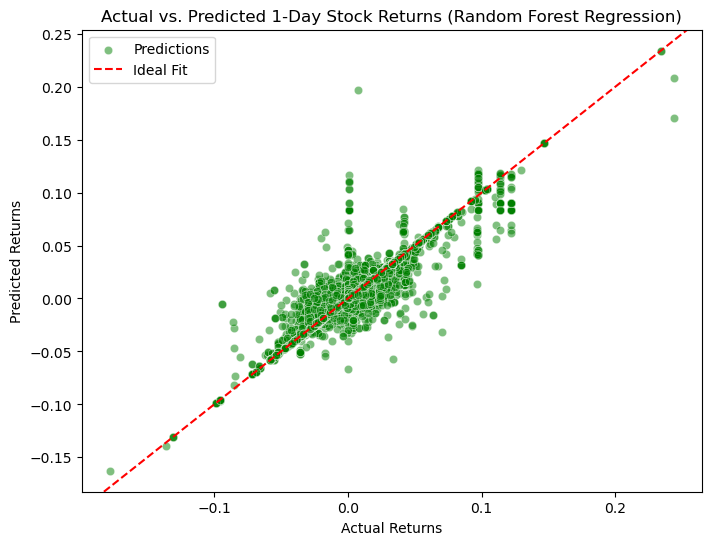

In [210]:
print("RandomForestRegressor predictions:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color="green", label="Predictions")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed", label="Ideal Fit")
plt.title("Actual vs. Predicted 1-Day Stock Returns (Random Forest Regression)")
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.legend()
plt.show()